In [18]:
import pandas as pd
import numpy as np
# Отображение всего вывода(по умолчанию отображается только последний)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
# delimetr- означает по какому символу данные отделяются друг от друга
df = pd.read_csv('../../data/pandas_tutorial_read.csv',delimiter=';')

In [8]:
df

,2018-01-01 00:01:01,read,country_7,2458151261,SEO,North America
0,2018-01-01 00:03:20,read,country_7,2458151262,SEO,South America
1,2018-01-01 00:04:01,read,country_7,2458151263,AdWords,Africa
2,2018-01-01 00:04:02,read,country_7,2458151264,AdWords,Europe
3,2018-01-01 00:05:03,read,country_8,2458151265,Reddit,North America
4,2018-01-01 00:05:42,read,country_6,2458151266,Reddit,North America
...,...,...,...,...,...,...
1789,2018-01-01 23:57:14,read,country_2,2458153051,AdWords,North America
1790,2018-01-01 23:58:33,read,country_8,2458153052,SEO,Asia
1791,2018-01-01 23:59:36,read,country_6,2458153053,Reddit,Asia
1792,2018-01-01 23:59:36,read,country_7,2458153054,AdWords,Europe


In [10]:
# У датафрейма неправильные заголовки поэтому установим их во время повторного чтения
# с помощью параметра names
df = pd.read_csv('../../data/pandas_tutorial_read.csv',delimiter=';',
                names=['my_datetime', 'event', 'country', 'user_id', 'source', 'topic'])
df.head()

,my_datetime,event,country,user_id,source,topic
0,2018-01-01 00:01:01,read,country_7,2458151261,SEO,North America
1,2018-01-01 00:03:20,read,country_7,2458151262,SEO,South America
2,2018-01-01 00:04:01,read,country_7,2458151263,AdWords,Africa
3,2018-01-01 00:04:02,read,country_7,2458151264,AdWords,Europe
4,2018-01-01 00:05:03,read,country_8,2458151265,Reddit,North America


In [11]:
# можно загружать файл напрямую через url
df = pd.read_csv(
    'https://pythonru.com/downloads/pandas_tutorial_read.csv',
    delimiter=';', 
    names=['my_datetime', 'event', 'country', 
           'user_id', 'source', 'topic']
)  
df.head()

,my_datetime,event,country,user_id,source,topic
0,2018-01-01 00:01:01,read,country_7,2458151261,SEO,North America
1,2018-01-01 00:03:20,read,country_7,2458151262,SEO,South America
2,2018-01-01 00:04:01,read,country_7,2458151263,AdWords,Africa
3,2018-01-01 00:04:02,read,country_7,2458151264,AdWords,Europe
4,2018-01-01 00:05:03,read,country_8,2458151265,Reddit,North America


In [12]:
#Вывод случайных  частей дата фрейма
df.sample(5)

,my_datetime,event,country,user_id,source,topic
101,2018-01-01 01:31:55,read,country_5,2458151362,AdWords,Asia
628,2018-01-01 08:27:41,read,country_4,2458151889,Reddit,Asia
459,2018-01-01 06:10:06,read,country_7,2458151720,AdWords,Asia
303,2018-01-01 04:07:19,read,country_2,2458151564,Reddit,Australia
988,2018-01-01 13:15:17,read,country_5,2458152249,AdWords,South America


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 6 columns):
my_datetime    1795 non-null object
event          1795 non-null object
country        1795 non-null object
user_id        1795 non-null int64
source         1795 non-null object
topic          1795 non-null object
dtypes: int64(1), object(5)
memory usage: 84.3+ KB


In [14]:
# Вывод выбранных колонок в виде датафрейма
df[['event','topic']]


,event,topic
0,read,North America
1,read,South America
2,read,Africa
3,read,Europe
4,read,North America
...,...,...
1790,read,North America
1791,read,Asia
1792,read,Asia
1793,read,Europe


In [15]:
# Вывод выбранных колонок в виде Series
df['event']

0       read
1       read
2       read
3       read
4       read
        ... 
1790    read
1791    read
1792    read
1793    read
1794    read
Name: event, Length: 1795, dtype: object

### Фильтрация определенных значений в dataframe

In [17]:
df[df['source']=='SEO'].head()


,my_datetime,event,country,user_id,source,topic
0,2018-01-01 00:01:01,read,country_7,2458151261,SEO,North America
1,2018-01-01 00:03:20,read,country_7,2458151262,SEO,South America
11,2018-01-01 00:08:57,read,country_7,2458151272,SEO,Australia
15,2018-01-01 00:11:22,read,country_7,2458151276,SEO,North America
16,2018-01-01 00:13:05,read,country_8,2458151277,SEO,North America


Важно понимать, как pandas работает с фильтрацией данных:

1. Pandas сравнивает каждую строчку в колонке source со значением SEO. Он возвращает DataSeries в котором у строк которые удовлетворяют условию будет стоять True а у строк неудовлетворяющих будет False. 

2. После этого он выводит дата фрейм со строками у которых  значением True




### Функции могут использоваться одна за другой
Важно понимать, что логика pandas очень линейна (как в SQL, например). Поэтому если вы применяете функцию, то можете применить другую к ней же. В таком случае входящие данные последней функции будут выводом предыдущей.

In [20]:
df.head()
df.head()[['country','user_id']]
# Логика здесь такова
# Сначала с помощью head() мы получаем дата фрейм состоящий из первых 5 значений 
# После этого к полученному датафрейму применяем отбор по столбцам

,my_datetime,event,country,user_id,source,topic
0,2018-01-01 00:01:01,read,country_7,2458151261,SEO,North America
1,2018-01-01 00:03:20,read,country_7,2458151262,SEO,South America
2,2018-01-01 00:04:01,read,country_7,2458151263,AdWords,Africa
3,2018-01-01 00:04:02,read,country_7,2458151264,AdWords,Europe
4,2018-01-01 00:05:03,read,country_8,2458151265,Reddit,North America


,country,user_id
0,country_7,2458151261
1,country_7,2458151262
2,country_7,2458151263
3,country_7,2458151264
4,country_8,2458151265


In [21]:
df[['country','user_id']].head()

,country,user_id
0,country_7,2458151261
1,country_7,2458151262
2,country_7,2458151263
3,country_7,2458151264
4,country_8,2458151265


In [24]:
# Выберите used_id , country и topic для пользователей из country_2. Выведите первые 5 строк!
df[df['country']=='country_2'][['user_id','country','topic']].head()

,user_id,country,topic
6,2458151267,country_2,Europe
13,2458151274,country_2,Europe
17,2458151278,country_2,Asia
19,2458151280,country_2,Asia
20,2458151281,country_2,Asia


### Основы Pandas №2 // Агрегация и группировка

Агрегация — это процесс превращения значений набора данных в одно значение. Например, у вас есть следующий набор данных…

animal	water_need
zebra	100
lion	350
elephant	670
kangaroo	200
…простейший метод агрегации для него — суммирование water_needs, то есть 100 + 350 + 670 + 200 = 1320. Как вариант, можно посчитать количество животных — 4. Теория не так сложна. Но пора переходить к практике.

In [26]:
zoo = pd.read_csv('../../data/zoo.csv',delimiter=',')
zoo.head()

,animal,uniq_id,water_need
0,elephant,1001,500
1,elephant,1002,600
2,elephant,1003,550
3,tiger,1004,300
4,tiger,1005,320


**Агрегация данных pandas №1: .count()**

In [30]:
zoo.count()
zoo['animal'].count()
# метод count просто подсчитываем количество строк или строк удовлетворяющих какому-то условию
zoo[zoo['animal']=='tiger']['animal'].count()

animal        22
uniq_id       22
water_need    22
dtype: int64

22

5

**Агрегация данных pandas №2: .sum()**

Суммирует значения по всем колонкам


In [32]:
# По одному столбцу
zoo['water_need'].sum()
# по всему датафрейму. 
zoo.sum()

7650

animal        elephantelephantelephanttigertigertigertigerti...
uniq_id                                                   22253
water_need                                                 7650
dtype: object

**Агрегация данных pandas №3 и №4: .min() и .max()**

In [36]:
# Возвращает минимальные или максимальные значения в столбце или датафрейме
zoo['water_need'].min()
zoo['water_need'].max()
zoo.min()
zoo.max()
# строковые значения отбираются по лексиграфическому порядку т.е а меньше б

80

600

animal        elephant
uniq_id           1001
water_need          80
dtype: object

animal        zebra
uniq_id        1022
water_need      600
dtype: object

**Агрегация данных pandas №5 и №6: .mean() и .median()**

In [40]:
# среднее
zoo['water_need'].mean()
# медиана
zoo['water_need'].median()
# Для всего датафрейма
zoo.mean()
zoo.median()
# Отметим что строковые данные автоматически были исключены, потому что как мы можем взять среднее или медиану от слова?

347.72727272727275

325.0

uniq_id       1011.500000
water_need     347.727273
dtype: float64

uniq_id       1011.5
water_need     325.0
dtype: float64

**Группировка в pandas**


In [41]:
# Позволяет сгруппировать данные по каким то категориям
# например посчитаем среднее количество воды которое требуется для каждого животного
zoo.groupby('animal').mean()
# столбец по которому идет группировка становится индексом нового датафрейма, а у всех значений относящихся к какой то категории
# вычисляется среднее


,uniq_id,water_need
animal,,
elephant,1002.0,550.000000
kangaroo,1021.0,416.666667
lion,1017.5,477.500000
tiger,1006.0,310.000000
zebra,1012.0,184.285714


In [44]:
# нужные колонки в группировке можно отбирать
# Возвращает обьект DataFrame, т.е нужны 2 квадратные скобки
zoo.groupby('animal')[['water_need']].median()
# Возвращает обьект DataSeries, одна квадратная скобка
zoo.groupby('animal')['water_need'].median()


,water_need
animal,
elephant,550
kangaroo,410
lion,460
tiger,310
zebra,220


animal
elephant    550
kangaroo    410
lion        460
tiger       310
zebra       220
Name: water_need, dtype: int64

In [46]:
# Kata
df = pd.read_csv('../../data/pandas_tutorial_read.csv',delimiter=';',
                names=['my_datetime', 'event', 'country', 'user_id', 'source', 'topic'])

In [73]:
# Kata 1 
# Какой источник информации используется чаще всего
df['source'].value_counts()
c= df['source'].value_counts().head(1)
c
# value counts считает количество  по каждому источнику и выдает их в порядке убывания. 
# head(1) мы получаем первую строку. Нужно помнить что head(0) это заголовок 
# Получить значение.Нужно помнить что Series это просто массив у которого могут быть как числовые так и строковые индексы
c[0]
# Чтобы достучатся до индекса
c.index[0]


Reddit     949
AdWords    500
SEO        346
Name: source, dtype: int64

Reddit    949
Name: source, dtype: int64

949

'Reddit'

In [67]:
# Покажет распределение в процентах
df['source'].value_counts(normalize=True)
# Преобразование Series в DataFrame
df['source'].value_counts(normalize=True).reset_index()
# Сортировка по индексу
df['source'].value_counts(normalize=True).sort_index()

Reddit     0.528691
AdWords    0.278552
SEO        0.192758
Name: source, dtype: float64

,index,source
0,Reddit,0.528691
1,AdWords,0.278552
2,SEO,0.192758


AdWords    0.278552
Reddit     0.528691
SEO        0.192758
Name: source, dtype: float64

In [69]:
# Через группировку
df.groupby('source').count()
# думаю мой вариант лучше

,my_datetime,event,country,user_id,topic
source,,,,,
AdWords,500,500,500,500,500
Reddit,949,949,949,949,949
SEO,346,346,346,346,346


In [80]:
df[(df['country']=='country_2') & (df['topic']=='Asia')]['source'].value_counts()

Reddit     139
AdWords     31
SEO          9
Name: source, dtype: int64

In [84]:
# условие страны df['country']=='country_2'
# находим через value_counts самую популярную тему, вытаскиваем первую строку(так как сортируется по убыванию) 
# из index полученного Series получаем название самого популярного топика
# В отобранном датафрейме с помощью value_counts повторяем тоже самое
df[(df['country']=='country_2') & (df['topic']==df['topic']
                                   .value_counts().head(1).index[0])]
['source'].value_counts().index[0]

'Reddit'

In [85]:
# чужой вариант 
df[df['country'] == 'country_2'].groupby(['source', 'topic']).count()

my_datetime  event  country  user_id
source  topic                                              
AdWords Africa                   3      3        3        3
        Asia                    31     31       31       31
        Australia                6      6        6        6
        Europe                  46     46       46       46
        North America           11     11       11       11
        South America           14     14       14       14
Reddit  Africa                  24     24       24       24
        Asia                   139    139      139      139
        Australia               18     18       18       18
        Europe                  29     29       29       29
        North America           27     27       27       27
        South America           26     26       26       26
SEO     Africa                   7      7        7        7
        Asia                     9      9        9        9
        Australia               10     10       10       10
        Europe                   4      4        4        4
        North America           42     42       42       42
        South America           16     16       16       16

### Основы Pandas №3 // Важные методы форматирования данных
##### Merge в pandas («объединение» Data Frames)

In [95]:
zoo = pd.read_csv('../../data/zoo.csv',delimiter=',')
zoo.head()
zoo_eats = pd.read_csv('../../data/zoo_eats.csv',delimiter=';')
zoo_eats

,animal,uniq_id,water_need
0,elephant,1001,500
1,elephant,1002,600
2,elephant,1003,550
3,tiger,1004,300
4,tiger,1005,320


,animal,food
0,elephant,vegetables
1,tiger,meat
2,kangaroo,vegetables
3,zebra,vegetables
4,giraffe,vegetables


In [96]:
zoo.merge(zoo_eats)

,animal,uniq_id,water_need,food
0,elephant,1001,500,vegetables
1,elephant,1002,600,vegetables
2,elephant,1003,550,vegetables
3,tiger,1004,300,meat
4,tiger,1005,320,meat
5,tiger,1006,330,meat
6,tiger,1007,290,meat
7,tiger,1008,310,meat
8,zebra,1009,200,vegetables
9,zebra,1010,220,vegetables


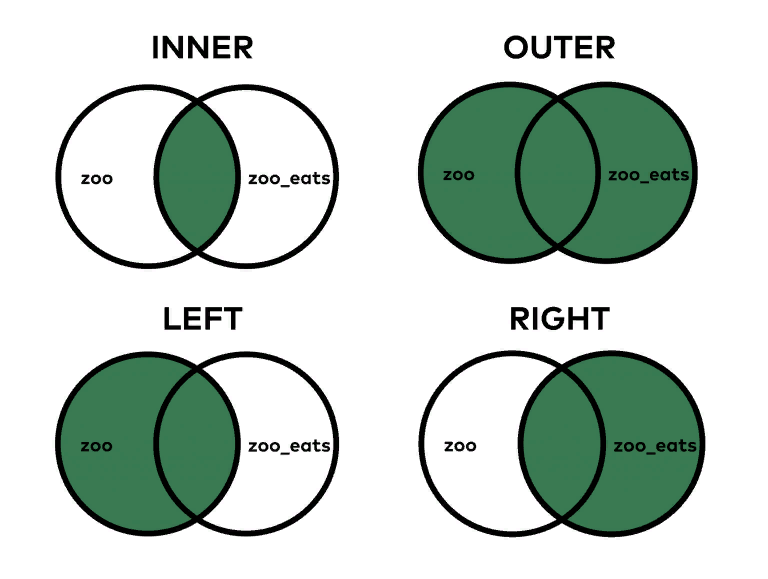

В случае с merge в pandas в теории это работает аналогичным образом.

При выборе INNER JOIN (вид по умолчанию в SQL и pandas) объединяются только те значения, которые можно найти в обеих таблицах. В случае же с OUTER JOIN объединяются все значения, даже если некоторые из них есть только в одной таблице.

Конкретный пример: в zoo_eats нет значения lion. А в zoo нет значения giraffe. По умолчанию использовался метод INNER, поэтому и львы, и жирафы пропали из таблицы. Но бывают случаи, когда нужно, чтобы все значения оставались в объединенном DataFrame. Этого можно добиться следующим образом:

In [97]:
zoo.merge(zoo_eats,how='outer')

,animal,uniq_id,water_need,food
0,elephant,1001.0,500.0,vegetables
1,elephant,1002.0,600.0,vegetables
2,elephant,1003.0,550.0,vegetables
3,tiger,1004.0,300.0,meat
4,tiger,1005.0,320.0,meat
5,tiger,1006.0,330.0,meat
6,tiger,1007.0,290.0,meat
7,tiger,1008.0,310.0,meat
8,zebra,1009.0,200.0,vegetables
9,zebra,1010.0,220.0,vegetables


В этот раз львы и жирафы вернулись. Но поскольку вторая таблица не предоставила конкретных данных, то вместо значения ставится пропуск (NaN).

Логичнее всего было бы оставить в таблице львов, но не жирафов. В таком случае будет три типа еды: vegetables, meat и NaN (что, фактически, значит, «информации нет»). Если же в таблице останутся жирафы, это может запутать, потому что в зоопарке-то этого вида животных все равно нет. Поэтому следует воспользоваться параметром how='left' при объединении.


In [98]:
zoo.merge(zoo_eats,how='left')

,animal,uniq_id,water_need,food
0,elephant,1001,500,vegetables
1,elephant,1002,600,vegetables
2,elephant,1003,550,vegetables
3,tiger,1004,300,meat
4,tiger,1005,320,meat
5,tiger,1006,330,meat
6,tiger,1007,290,meat
7,tiger,1008,310,meat
8,zebra,1009,200,vegetables
9,zebra,1010,220,vegetables


**Merge в pandas. По какой колонке?**
Для использования merge библиотеке pandas нужны ключевые колонки, на основе которых будет проходить объединение (в случае с примером это колонка animal). Иногда pandas не сможет распознать их автоматически, и тогда нужно указать названия колонок. Для этого нужны параметры left_on и right_on.

Например, последний merge мог бы выглядеть следующим образом:

**Примечание**: в примере pandas автоматически нашел ключевые колонки, но часто бывает так, что этого не происходит. Поэтому о left_on и right_on не стоит забывать.


In [103]:
zoo.merge(zoo_eats,how='left',left_on='animal',right_on='animal')

,animal,uniq_id,water_need,food
0,elephant,1001,500,vegetables
1,elephant,1002,600,vegetables
2,elephant,1003,550,vegetables
3,tiger,1004,300,meat
4,tiger,1005,320,meat
5,tiger,1006,330,meat
6,tiger,1007,290,meat
7,tiger,1008,310,meat
8,zebra,1009,200,vegetables
9,zebra,1010,220,vegetables


**Сортировка в pandas**

Сортировка необходима. Базовый метод сортировки в pandas совсем не сложный. Функция называется sort_values() и работает она следующим образом:

In [106]:
zoo.sort_values('water_need').head()
# Сортировка по нескольким колонкам.Сначала сортируется по первой колонке, затем по второй
zoo.sort_values(by=['animal','water_need'])
# 

,animal,uniq_id,water_need
14,zebra,1015,80
13,zebra,1014,100
8,zebra,1009,200
9,zebra,1010,220
12,zebra,1013,220


,animal,uniq_id,water_need
0,elephant,1001,500
2,elephant,1003,550
1,elephant,1002,600
19,kangaroo,1020,410
21,kangaroo,1022,410
20,kangaroo,1021,430
18,lion,1019,390
15,lion,1016,420
17,lion,1018,500
16,lion,1017,600


In [109]:
# Сортировка по убыванию
zoo.sort_values(by='water_need',ascending=False).head()

,animal,uniq_id,water_need
1,elephant,1002,600
16,lion,1017,600
2,elephant,1003,550
0,elephant,1001,500
17,lion,1018,500


In [110]:
# Сортировка по нескольким столбцам, в первом по возрастанию а во втором по убыванию
zoo.sort_values(by=['animal','water_need'],ascending=[True,False])

,animal,uniq_id,water_need
1,elephant,1002,600
2,elephant,1003,550
0,elephant,1001,500
20,kangaroo,1021,430
19,kangaroo,1020,410
21,kangaroo,1022,410
16,lion,1017,600
17,lion,1018,500
15,lion,1016,420
18,lion,1019,390


####  reset_index()
Заметили ли вы, какой беспорядок теперь в нумерации после последней сортировки?

In [111]:
zoo.sort_values(by=['animal','water_need'],ascending=[True,False]).head()

,animal,uniq_id,water_need
1,elephant,1002,600
2,elephant,1003,550
0,elephant,1001,500
20,kangaroo,1021,430
19,kangaroo,1020,410


Это не просто выглядит некрасиво… неправильная индексация может испортить визуализации или повлиять на то, как работают модели машинного обучения.

В случае изменения DataFrame нужно переиндексировать строки. Для этого можно использовать метод reset_index(). Например:

In [112]:
zoo.sort_values(by=['animal','water_need'],ascending=[True,False]).head().reset_index()

,index,animal,uniq_id,water_need
0,1,elephant,1002,600
1,2,elephant,1003,550
2,0,elephant,1001,500
3,20,kangaroo,1021,430
4,19,kangaroo,1020,410


Можно заметить, что новый DataFrame также хранит старые индексы. Если они не нужны, их можно удалить с помощью параметра drop=True в функции:

In [113]:
zoo.sort_values(by=['animal','water_need'],ascending=[True,False]).head().reset_index(drop=True)
# Как видим столбик со старыми индексами был удален

,animal,uniq_id,water_need
0,elephant,1002,600
1,elephant,1003,550
2,elephant,1001,500
3,kangaroo,1021,430
4,kangaroo,1020,410


In [116]:
# Присвоение строковых индексов
d= zoo.sort_values(by=['animal','water_need'],ascending=[True,False]).head(3).reset_index(drop=True)
text_index=['Lindy Booth','Lindesey Stirling','Eva Green']
d.index=text_index
d

,animal,uniq_id,water_need
Lindy Booth,elephant,1002,600
Lindesey Stirling,elephant,1003,550
Eva Green,elephant,1001,500


#### Работа с пропущенными значениями
Примечание: fillna — это слова fill( заполнить) и na(не доступно).

Запустим еще раз метод left-merge:

In [117]:
zoo.merge(zoo_eats,how='left')

,animal,uniq_id,water_need,food
0,elephant,1001,500,vegetables
1,elephant,1002,600,vegetables
2,elephant,1003,550,vegetables
3,tiger,1004,300,meat
4,tiger,1005,320,meat
5,tiger,1006,330,meat
6,tiger,1007,290,meat
7,tiger,1008,310,meat
8,zebra,1009,200,vegetables
9,zebra,1010,220,vegetables


Это все животные. Проблема только в том, что для львов есть значение NaN. Само по себе это значение может отвлекать, поэтому лучше заменять его на что-то более осмысленное. Иногда это может быть 0, в других случаях — строка. Но в этот раз обойдемся unknown. Функция fillna() автоматически найдет и заменит все значения NaN в DataFrame:

In [118]:
zoo.merge(zoo_eats,how='left').fillna('unknown')

,animal,uniq_id,water_need,food
0,elephant,1001,500,vegetables
1,elephant,1002,600,vegetables
2,elephant,1003,550,vegetables
3,tiger,1004,300,meat
4,tiger,1005,320,meat
5,tiger,1006,330,meat
6,tiger,1007,290,meat
7,tiger,1008,310,meat
8,zebra,1009,200,vegetables
9,zebra,1010,220,vegetables


Задания


In [121]:
article_read = pd.read_csv('../../data/pandas_tutorial_read.csv',delimiter=';',
                names=['my_datetime', 'event', 'country', 'user_id', 'source', 'topic'])
blog_buy = pd.read_csv('https://pythonru.com/downloads/pandas_tutorial_buy.csv',delimiter=';',
                      names=['my_date_time', 'event', 'user_id', 'amount'])

In [123]:
blog_buy
article_read

,my_date_time,event,user_id,amount
0,2018-01-01 04:04:59,buy,2458151555,8
1,2018-01-01 09:28:00,buy,2458151933,8
2,2018-01-01 13:23:16,buy,2458152245,8
3,2018-01-01 14:20:43,buy,2458152315,100
4,2018-01-02 02:57:43,buy,2458153264,8
...,...,...,...,...
65,2018-01-07 18:44:58,buy,2458157339,8
66,2018-01-07 19:09:53,buy,2458157601,8
67,2018-01-07 20:24:35,buy,2458157193,8
68,2018-01-07 22:11:28,buy,2458157128,8


,my_datetime,event,country,user_id,source,topic
0,2018-01-01 00:01:01,read,country_7,2458151261,SEO,North America
1,2018-01-01 00:03:20,read,country_7,2458151262,SEO,South America
2,2018-01-01 00:04:01,read,country_7,2458151263,AdWords,Africa
3,2018-01-01 00:04:02,read,country_7,2458151264,AdWords,Europe
4,2018-01-01 00:05:03,read,country_8,2458151265,Reddit,North America
...,...,...,...,...,...,...
1790,2018-01-01 23:57:14,read,country_2,2458153051,AdWords,North America
1791,2018-01-01 23:58:33,read,country_8,2458153052,SEO,Asia
1792,2018-01-01 23:59:36,read,country_6,2458153053,Reddit,Asia
1793,2018-01-01 23:59:36,read,country_7,2458153054,AdWords,Europe


Какой средний доход в период с 2018-01-01 по 2018-01-07 от пользователей из article_read?

Выведите топ-3 страны по общему уровню дохода за период с 2018-01-01 по 2018-01-07. (Пользователей из article_read здесь тоже нужно использовать).

In [125]:
article_read.merge(blog_buy)
blog_buy.merge(article_read)
# Почему не выходит? . Потому что пандас не распознал по каким ключевым колонкам надо обьединять таблицы

,my_datetime,event,country,user_id,source,topic,my_date_time,amount


,my_date_time,event,user_id,amount,my_datetime,country,source,topic


In [126]:
article_read.merge(blog_buy,left_on='user_id',right_on='user_id')
# Обьединение по умолчанию inner join, то есть пересечение. Только те user_id которые есть в обоих таблицах

,my_datetime,event_x,country,user_id,source,topic,my_date_time,event_y,amount
0,2018-01-01 00:13:39,read,country_4,2458151279,SEO,North America,2018-01-05 10:23:05,buy,100
1,2018-01-01 02:55:28,read,country_2,2458151468,SEO,Asia,2018-01-02 18:09:20,buy,88
2,2018-01-01 03:07:05,read,country_5,2458151481,SEO,Europe,2018-01-03 01:33:30,buy,200
3,2018-01-01 03:20:59,read,country_5,2458151500,SEO,North America,2018-01-04 10:43:38,buy,8
4,2018-01-01 03:31:22,read,country_4,2458151525,Reddit,Asia,2018-01-02 07:57:24,buy,80
5,2018-01-01 03:56:17,read,country_4,2458151555,AdWords,Asia,2018-01-01 04:04:59,buy,8
6,2018-01-01 06:38:34,read,country_4,2458151757,Reddit,Asia,2018-01-02 19:14:09,buy,8
7,2018-01-01 06:52:28,read,country_4,2458151771,AdWords,Europe,2018-01-02 12:47:33,buy,8
8,2018-01-01 08:52:12,read,country_2,2458151911,SEO,Asia,2018-01-04 17:40:11,buy,100
9,2018-01-01 08:59:56,read,country_5,2458151919,SEO,Europe,2018-01-02 23:01:53,buy,8


In [127]:
article_read.merge(blog_buy,how='outer',left_on='user_id',right_on='user_id')
# Как видим общее обьединение просто слило 2 таблицы, та где не было данных то просто добавило Nan

,my_datetime,event_x,country,user_id,source,topic,my_date_time,event_y,amount
0,2018-01-01 00:01:01,read,country_7,2458151261,SEO,North America,NaN,NaN,NaN
1,2018-01-01 00:03:20,read,country_7,2458151262,SEO,South America,NaN,NaN,NaN
2,2018-01-01 00:04:01,read,country_7,2458151263,AdWords,Africa,NaN,NaN,NaN
3,2018-01-01 00:04:02,read,country_7,2458151264,AdWords,Europe,NaN,NaN,NaN
4,2018-01-01 00:05:03,read,country_8,2458151265,Reddit,North America,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1840,NaN,NaN,NaN,2458157339,NaN,NaN,2018-01-07 18:44:58,buy,8.0
1841,NaN,NaN,NaN,2458157601,NaN,NaN,2018-01-07 19:09:53,buy,8.0
1842,NaN,NaN,NaN,2458157193,NaN,NaN,2018-01-07 20:24:35,buy,8.0
1843,NaN,NaN,NaN,2458157128,NaN,NaN,2018-01-07 22:11:28,buy,8.0


In [128]:
# Пример заполнения значений Nan
article_read.merge(blog_buy,how='outer',left_on='user_id',right_on='user_id').fillna('Нет данных')

,my_datetime,event_x,country,user_id,source,topic,my_date_time,event_y,amount
0,2018-01-01 00:01:01,read,country_7,2458151261,SEO,North America,Нет данных,Нет данных,Нет данных
1,2018-01-01 00:03:20,read,country_7,2458151262,SEO,South America,Нет данных,Нет данных,Нет данных
2,2018-01-01 00:04:01,read,country_7,2458151263,AdWords,Africa,Нет данных,Нет данных,Нет данных
3,2018-01-01 00:04:02,read,country_7,2458151264,AdWords,Europe,Нет данных,Нет данных,Нет данных
4,2018-01-01 00:05:03,read,country_8,2458151265,Reddit,North America,Нет данных,Нет данных,Нет данных
...,...,...,...,...,...,...,...,...,...
1840,Нет данных,Нет данных,Нет данных,2458157339,Нет данных,Нет данных,2018-01-07 18:44:58,buy,8
1841,Нет данных,Нет данных,Нет данных,2458157601,Нет данных,Нет данных,2018-01-07 19:09:53,buy,8
1842,Нет данных,Нет данных,Нет данных,2458157193,Нет данных,Нет данных,2018-01-07 20:24:35,buy,8
1843,Нет данных,Нет данных,Нет данных,2458157128,Нет данных,Нет данных,2018-01-07 22:11:28,buy,8


In [145]:
# Kata 1
# Какой средний доход в период с 2018-01-01 по 2018-01-07 от пользователей из article_read?
# В этой задаче есть 3 части. Нам нужно узнать пользователей покупателей.
# Нам нужно отобрать записи удовлетворяющие заданному промежутку 
# Посчитать среднее значение
# Пользователи покупатели

temp_df = article_read.merge(blog_buy,how='left',left_on='user_id',right_on='user_id')
temp_df

,my_datetime,event_x,country,user_id,source,topic,my_date_time,event_y,amount
0,2018-01-01 00:01:01,read,country_7,2458151261,SEO,North America,NaN,NaN,NaN
1,2018-01-01 00:03:20,read,country_7,2458151262,SEO,South America,NaN,NaN,NaN
2,2018-01-01 00:04:01,read,country_7,2458151263,AdWords,Africa,NaN,NaN,NaN
3,2018-01-01 00:04:02,read,country_7,2458151264,AdWords,Europe,NaN,NaN,NaN
4,2018-01-01 00:05:03,read,country_8,2458151265,Reddit,North America,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1790,2018-01-01 23:57:14,read,country_2,2458153051,AdWords,North America,NaN,NaN,NaN
1791,2018-01-01 23:58:33,read,country_8,2458153052,SEO,Asia,2018-01-07 09:11:04,buy,8.0
1792,2018-01-01 23:59:36,read,country_6,2458153053,Reddit,Asia,NaN,NaN,NaN
1793,2018-01-01 23:59:36,read,country_7,2458153054,AdWords,Europe,NaN,NaN,NaN


In [147]:
temp_df['amount'].fillna(0).mean()

1.0852367688022284

# Pandas на практических примерах

In [148]:
import matplotlib as plt
%matplotlib inline

In [150]:
df = pd.read_csv('../../data/hubble_data.csv')
df

,distance,recession_velocity
0,0.032,170
1,0.034,290
2,0.214,-130
3,0.263,-70
4,0.275,-185
5,0.275,-220
6,0.450,200
7,0.500,290
8,0.500,270
9,0.630,200


Теперь, когда данные есть, на их основе нужно построить график.

Проще всего добиться этого, избавившись от индексов. Pandas по умолчанию добавляет номера (как и Excel). Если посмотреть на структуру данных, будет видно, что левая строка имеет значения 0,1,2,3,4....

Если заменить номера на distance, тогда построение графиков станет еще проще. distance станет осью x, а velocity — осью y.

Но как заменить индексы?

In [152]:
df.set_index('distance')
df

,recession_velocity
distance,
0.032,170
0.034,290
0.214,-130
0.263,-70
0.275,-185
0.275,-220
0.450,200
0.500,290
0.500,270


,distance,recession_velocity
0,0.032,170
1,0.034,290
2,0.214,-130
3,0.263,-70
4,0.275,-185
5,0.275,-220
6,0.450,200
7,0.500,290
8,0.500,270
9,0.630,200


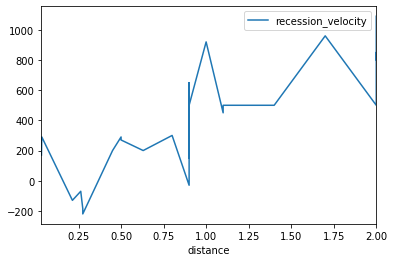

In [160]:
df.set_index('distance').plot();



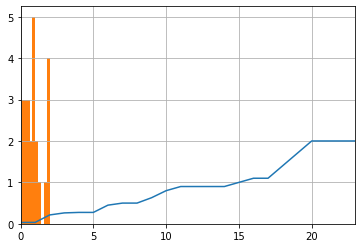

In [164]:
df['distance'].plot();
df['distance'].hist();